**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2024 &#x25aa; Uhan**

# Lesson 2. JupyterLab and Exploratory Data Analysis

## What is JupyterLab?

* [__JupyterLab__](https://jupyter.org/) is an interactive computational environment where you can combine code, text and graphs in __notebooks__

* You're looking at a Jupyter notebook right now!

* We'll be using JupyterLab with the [__R__](https://www.r-project.org/) programming language in this course

### Structure of a notebook document

* A notebook consists of a sequence of __cells__ of different types

* We'll use two types of cells frequently:  
    * code cells
    * Markdown cells

* You can determine the type of a cell in the toolbar

* You can run a cell by:
    * clicking the <kbd><i class="fa fa-play" aria-hidden="true"></i></kbd> button in the toolbar
    * selecting __Run &#8594; Run Selected Cells__ in the menu bar
    * pressing <kbd>Shift</kbd>-<kbd>Enter</kbd>

### Code cells

* In a __code cell__, you can edit and write R code

* For example, we can print a simple message:

In [1]:
# Solution
print("Hello, world")

[1] "Hello, world"


* We'll get more involved with R shortly


* Note that a code cell has 
    * an __input__ section containing your code
    * an __output__ section after executing the cell

### Markdown cells

* In a __Markdown cell__, you can enter text to write notes about your code and document your workflow

* For example, this cell is a Markdown cell

* The __Markdown__ language is a popular way to provide formatting (e.g. bold, italics, lists) to plain text
    * Use Google to find documentation and tutorials. [Here's a pretty good cheat sheet.](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

* For now, here are a few basic, useful Markdown constructs:

```
You can format text as italic with *asterisks* or _underscores_.

You can format text as bold with **double asterisks** or __double underscores__.

To write an bulleted list, use *, -, or + as bullets, like this:

* One
* Two
* Three
```


* To edit a Markdown cell, double-click it 


* When you're done editing it, run the cell


* Try it in the cell below:

*Double-click to edit this cell. Try out Markdown here.*

### Manipulating cells

* You can insert a new cell by clicking the <kbd>+</kbd> button in the toolbar


* You can copy and paste cells using the __Edit__ menu


* You can also split, merge, move, and delete cells using the __Edit__ menu


* You can also move cells around with your mouse: click on the left part of a cell and drag it to where you want it

### Saving your notebook

* JupyterLab autosaves your notebook every few minutes
    * Check __Settings &#8594; Autosave Documents__ to make sure this setting is turned on

* To manually save, click the <kbd><i class="fa fa-floppy-o"></i></kbd> icon, or select __File &#8594; Save Notebook__

* When you're done, you can shut down JupyterLab by selecting __File &#8594; Shut Down__

<hr style="border-top: 2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

## Random variables and distributions in R

* Recall from the previous lesson...

* Let $X$ be a continuous random variable with some distribution

* The __cdf__ of $X$ is $F_X(x) = P(X \le x)$

* The __pdf__ of $X$ is $f_X(x) = \dfrac{d}{dx} F(x)$

* The __$p$-quantile__ of $X$ is the value $a$ such that $F_X(a) = P(X \le a) = p$

* R has functions to compute the cdf, pdf, and quantiles for many common (and uncommon) distributions

* Suppose $X \sim N(2, 8)$
    * i.e., a Normal distribution with mean $\mu = 2$ and variance $\sigma^2 = 8$

* We can find $F_X(3) = P(X \le 3)$ in R like this:

In [2]:
# Solution
pnorm(3, mean = 2, sd = sqrt(8))

[1] 0.6381632

* We can find $f_X(3)$, the pdf value at 3 for $X \sim N(2, 8)$, like this:

In [3]:
# Solution
dnorm(3, mean = 2, sd = sqrt(8))

[1] 0.1325018

* We can also find the 0.75-quantile of $X \sim N(2, 8)$ like this: 

In [4]:
# Solution
qnorm(0.75, mean = 2, sd = sqrt(8))

[1] 3.907745

- In general in R:

    - cdf functions start with `p`: e.g., `pnorm`, `pt`, `punif`
    
    - pdf functions start with `d`: e.g., `dnorm`, `dt`, `dunif`
    
    - quantile functions start with `q`: e.g., `qnorm`, `qt`, `qunif`

<hr style="border-top: 2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

## An introduction to exploratory data analysis

* Before we do formal analysis, we want a big picture idea of what's going on with the data

* This is called __exploratory data analysis__

* For now, we will focus on one variable at a time

### Reading data into R

* R can read data in a variety of formats

* One of the most common formats for tabular data is the __CSV file__

* CSV stands for __comma-separated values__

* In the same folder as this notebook, there is a CSV file `data/Michelson.csv`

* Let's see what this data looks like, using JupyterLab's file viewer...

* An R __data frame__ is a two-dimensional table, with rows and columns

* Sometimes we refer to the columns as _variables_ and the rows as *observations*, since tabular data is commonly set up this way

* We can read the data in `data/Michelson.csv` into a R data frame (a.k.a. table) called `Michelson` like this: 

In [5]:
# Solution
Michelson <- read.table('data/Michelson.csv', header=TRUE, sep=',')

* We can use the `head()` function to examine the first few rows of `Michelson`: 

In [6]:
# Solution
head(Michelson)

,Date,Image,Temperature,Velocity,Time
,<chr>,<chr>,<int>,<int>,<chr>
1,7-Jun,fair,72,299740,pm
2,7-Jun,fair,72,299900,pm
3,7-Jun,fair,72,300070,pm
4,7-Jun,fair,72,299930,pm
5,7-Jun,fair,72,299850,pm
6,9-Jun,good,83,299950,pm


* We can access the `Velocity` variable of the `Michelson` data frame like this:

In [7]:
# Solution
Michelson$Velocity

[1] 299740 299900 300070 299930 299850 299950 299980 299980 299880 300000
[11] 299980 299930 299650 299760 299810 300000 300000 299960 299960 299960
[21] 299940 299960 299940 299880 299800 299850 299880 299900 299840 299830
[31] 299790 299810 299880 299880 299830 299800 299790 299760 299800 299880
[41] 299880 299880 299860 299720 299720 299620 299860 299979 299950 299880
[51] 299910 299850 299879 299640 299840 299850 299840 299840 299840 299890
[61] 299810 299810 299820 299800 299770 299760 299740 299750 299760 299910
[71] 299920 299890 299860 299880 299720 299840 299850 299850 299780 299890
[81] 299840 299780 299810 299760 299810 299790 299810 299820 299850 299870
[91] 299870 299810 299740 299810 299940 299950 299800 299810 299870

### The five-number summary

* The __five-number summary__ of a variable gives us a quick snapshot of how the observations are distributed:

    1. __minimum__: the lowest data value
    
    2. __1st quartile (Q1)__: 25\% of the data lie below this data value
    
    3. __median__: the "middle" data value; also the 2nd quartile
    
    4. __3rd quartile (Q3)__: 75\% of the data lie below this data value
    
    5. __maximum__: the largest data value

* In R, we can get a five-number summary of the `Velocity` variable in the `Michelson` data frame like this:

In [8]:
# Solution
summary(Michelson$Velocity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 299620  299800  299850  299851  299895  300070 

* We can also get these values with their individual functions in R: 

In [9]:
# Solution
min(Michelson$Velocity)
quantile(Michelson$Velocity, probs=0.25)
median(Michelson$Velocity)
quantile(Michelson$Velocity, probs=0.75)
max(Michelson$Velocity)

[1] 299620

25% 
299800

[1] 299850

75% 
299895

[1] 300070

### Other summary statistics

- Some other common summary statistics:

    * __mean__: the average data value

    * __variance, standard deviation__: describe the spread of the data
    
    * __$k$th percentile__: $k$% of the data lie below this value

* In R, we can compute the 60th percentile of the `Velocity` variable like this:

In [10]:
# Solution
quantile(Michelson$Velocity, probs=0.60)

60% 
299870

* Similarly, we can compute the mean and standard deviation of the `Velocity` variable like this:

In [11]:
# Solution
mean(Michelson$Velocity)
sd(Michelson$Velocity)

[1] 299850.6

[1] 82.39081

### Tables

* Tables are commonly used to summarize categorical variables

* We can create a __one-way table__ that tabulates the number of `am` and `pm` values in the `Time` variable, like this: 

In [12]:
# Solution
table(Michelson$Time)


am pm 
37 62 

* We can create a __two-way table__ for the values in the `Time` and `Image` variables, like this: 

In [13]:
# Solution
table(Michelson$Time, Michelson$Image)

    
     fair good poor
  am   12   15   10
  pm   27   30    5

### Graphics

#### Histogram

* A __histogram__ divides the data values into "bins" and plots the relative frequency of data values in each bin

* A histogram helps us see the _shape_ of the distribution (e.g., symmetric or skewed) and _potential outliers_ (extreme values far away from most of the data)

* We can create a histogram of the values in the `Velocity` variable, like this:

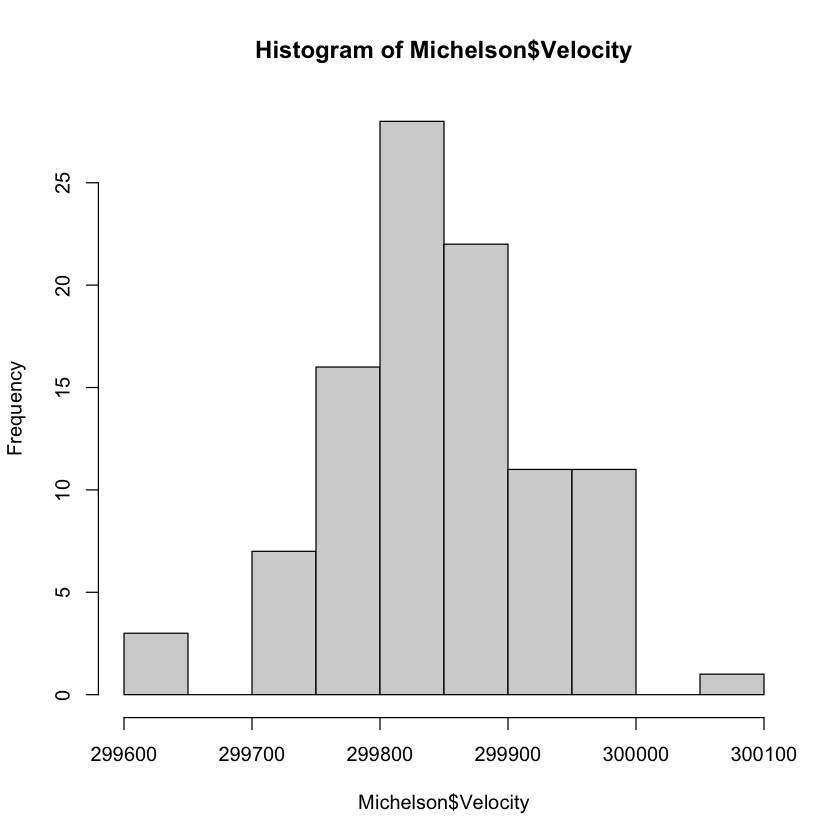

In [14]:
# Solution
hist(Michelson$Velocity)

* We can change the number of bin widths used, like this:

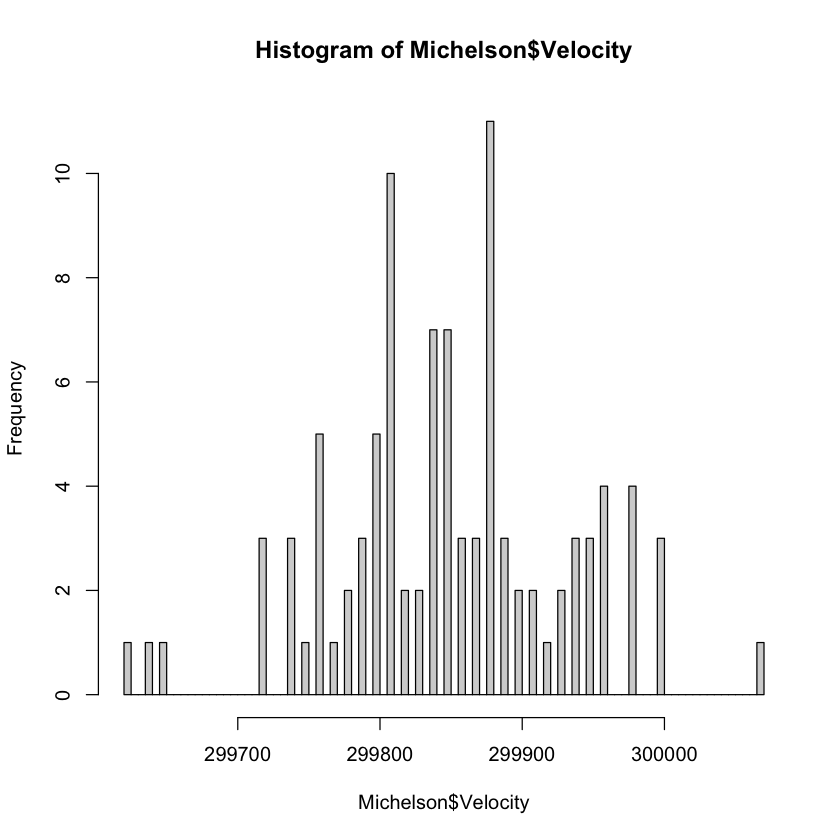

In [15]:
# Solution
hist(Michelson$Velocity, breaks=100)

#### Boxplot

* A __boxplot__ is a visual representation of the five-number summary

<img src="img/boxplot-annotated.jpg" width="700" />

* A boxplot also helps us see the shape of the distribution and potential outliers

* We can create a boxplot of the values in the `Velocity` column, like this:

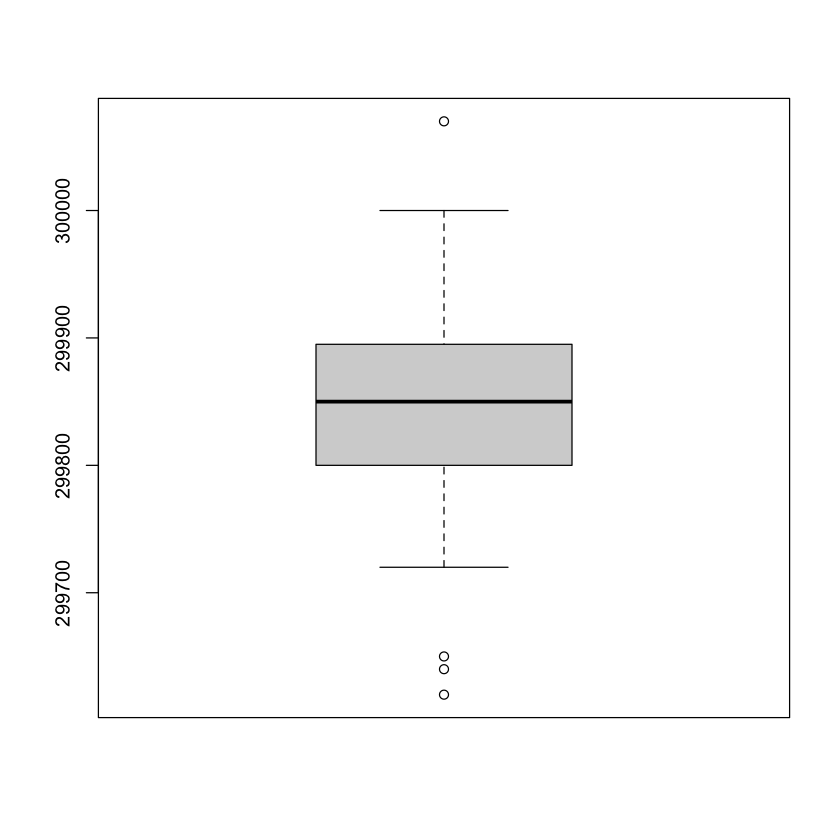

In [16]:
# Solution
boxplot(Michelson$Velocity)

* We can make the boxplot horizontal instead, like this:

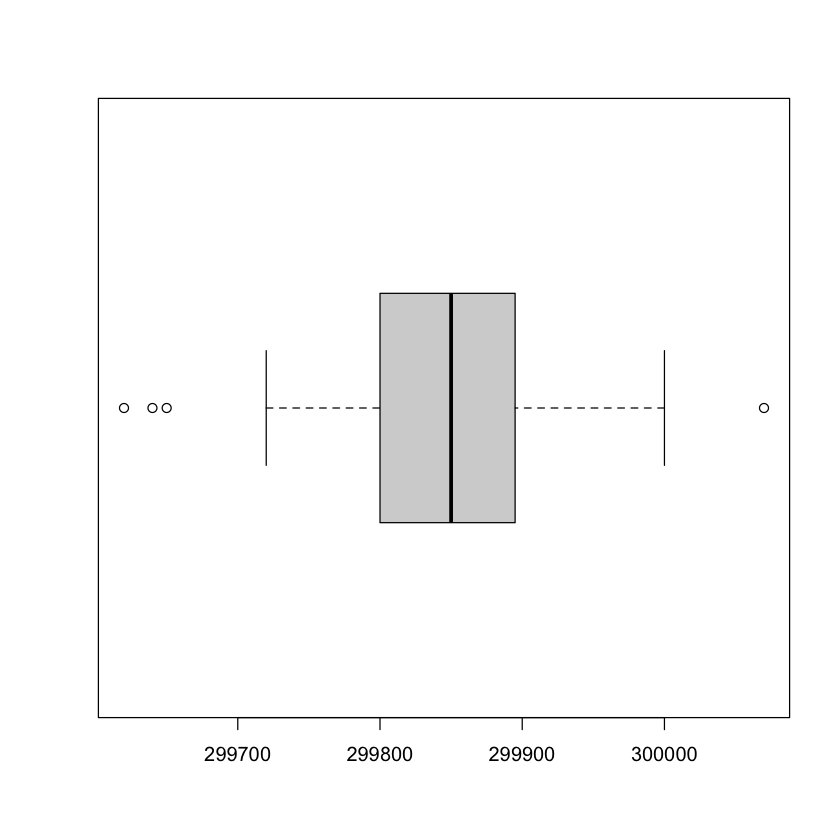

In [17]:
# Solution
boxplot(Michelson$Velocity, horizontal=TRUE)

#### Normal Q-Q plot

* A __Normal Q-Q plot__ plots the quantiles of a Normal distribution versus the data quantiles


* A Normal Q-Q plot is used to _check for normality_ 
    - If the points follow an approximately straight line, then it is reasonable to assume that the data came from a (close to) Normal distribution

* We can create a Normal Q-Q plot of the values in the `Velocity` vector as follows:

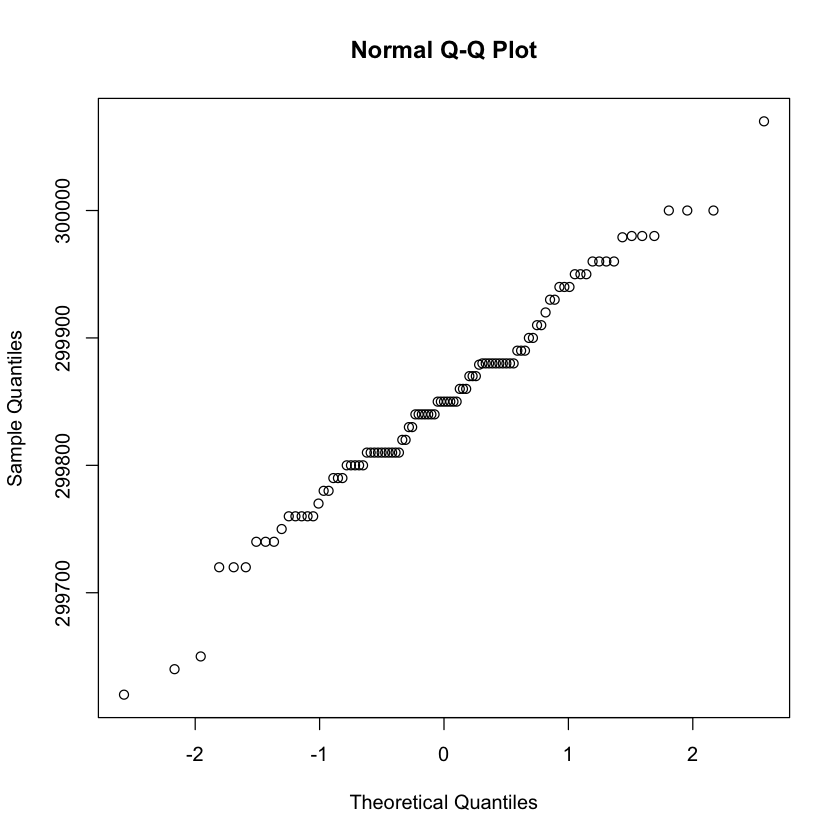

In [18]:
# Solution
qqnorm(Michelson$Velocity)

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Exercises

### Problem 1

If $X$ has a $t$-distribution with 8 degrees of freedom (i.e., $t(8)$), we can find the $p$-quantile of $X$ in R using `qt(p, df = 8)`.

For example, we can find $a$ such that $P(X \le a) = 0.95$ like this:

In [19]:
qt(0.95, df = 8)

[1] 1.859548

Find $a$ for each of the following.

(a) $P(X > x^*) = 0.95$

*Solution.* Since $P(X > a) = 0.95$, we have $P(X \le a) = 1 - P(X > a) = 1 - 0.95 = 0.05$. So,

In [20]:
# Solution
qt(0.05, df = 8)

[1] -1.859548

(b) $P(X < a) = 0.10$

In [21]:
# Solution
qt(0.10, df = 8)

[1] -1.396815

(c) $P(X > a) = 0.10$

*Solution.* Since $P(X > a) = 0.10$, we have $P(X \le a) = 1 - P(X > a) = 1 - 0.10 = 0.90$. So, 

In [22]:
# Solution
qt(0.90, df = 8)

[1] 1.396815

(d) $P(X < a) = 0.5$

In [23]:
# Solution
qt(0.5, df = 8)

[1] 0

### Problem 2

We can plot the pdf of $X \sim N(2, 8)$ in R with the following steps:

1. Create a sequence of x values, like this:
    
    ```r
    xx <- seq(from = -5, to = 5, by = 0.1)
    ```
    <br>

2. Find the pdf value for each of these x values using `dnorm`, like this:
    
    ```r
    pdf <- dnorm(xx, mean = 2, sd = sqrt(8))
    ```
    <br>
        
3. Plot the x values vs. the pdf values, like this:
    
   ```r
   plot(xx, pdf, type = "l")  # "l" for line
   ```

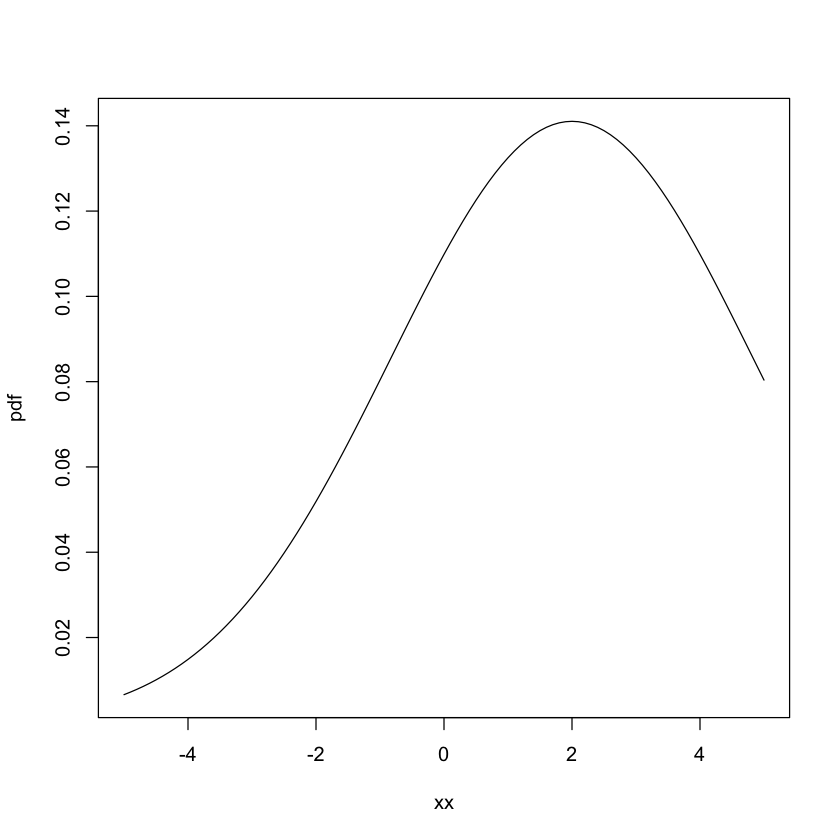

In [24]:
xx <- seq(from = -5, to = 5, by = 0.1)
pdf <- dnorm(xx, mean = 2, sd = sqrt(8))
plot(xx, pdf, type = "l")

The R code below creates a plot that overlays four Normal pdfs: each Normal distribution has a standard deviation of 1, and the means are 0, 1, 2, and 3.

Run the R code below. What happens to the PDF as the mean increases?

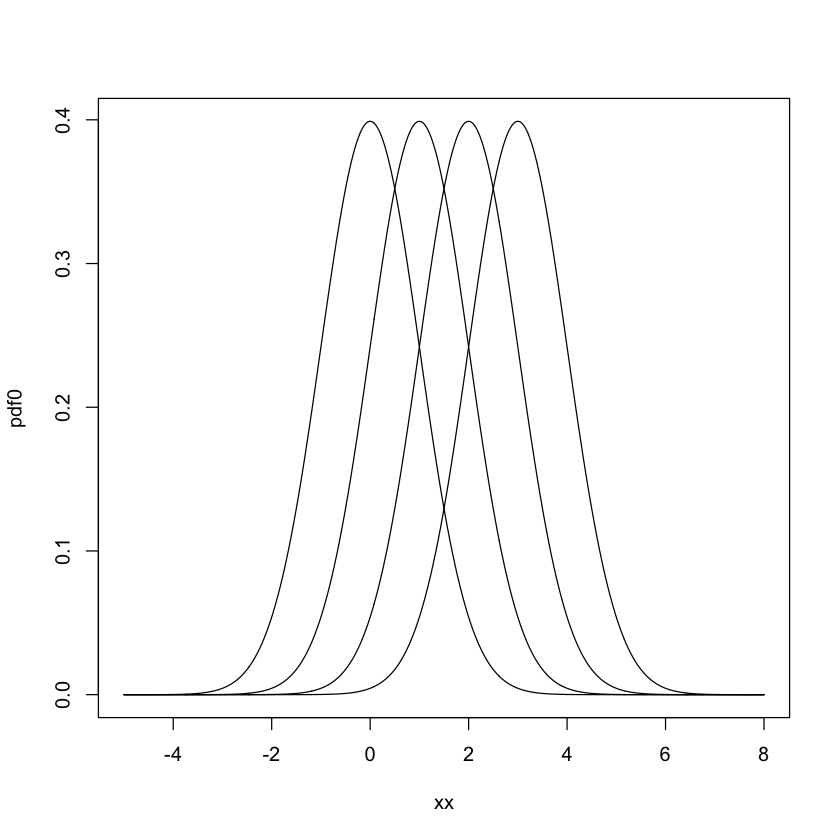

In [25]:
xx <- seq(-5, 8, by=0.01)
pdf0 <- dnorm(xx, mean = 0, sd = 1)
pdf1 <- dnorm(xx, mean = 1, sd = 1)
pdf2 <- dnorm(xx, mean = 2, sd = 1)
pdf3 <- dnorm(xx, mean = 3, sd = 1)

plot(xx, pdf0, type="l")
lines(xx, pdf1)
lines(xx, pdf2)
lines(xx, pdf3)

*Write your answer here. Double-click to edit.*

*Solution.* As the mean increases, the PDF shifts to the right.

### Problem 3

Modify the code in Problem 2 to create another plot that overlays four Normal PDFs. This time, they should all have the same mean 0, but the standard deviations should be 0.5, 1, 2, and 4. What happens to the PDF as the standard deviation increases?

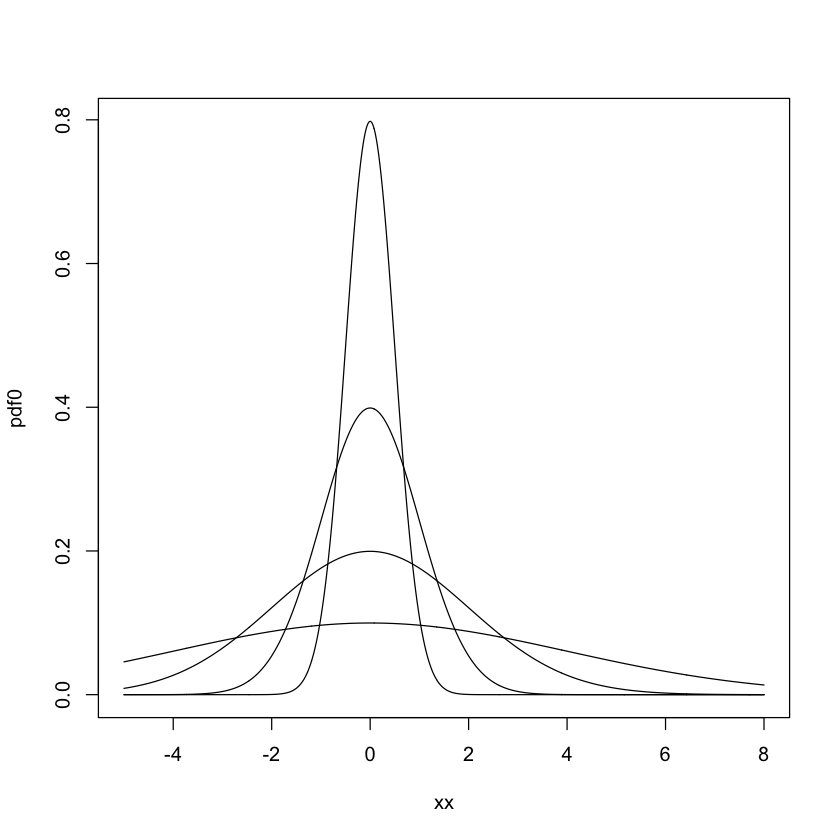

In [26]:
# Solution
xx <- seq(-5, 8, by=0.01)
pdf0 <- dnorm(xx, mean = 0, sd = 0.5)
pdf1 <- dnorm(xx, mean = 0, sd = 1)
pdf2 <- dnorm(xx, mean = 0, sd = 2)
pdf3 <- dnorm(xx, mean = 0, sd = 4)

plot(xx, pdf0, type="l")
lines(xx, pdf1)
lines(xx, pdf2)
lines(xx, pdf3)

*Write your answer here. Double-click to edit.*

*Solution.* As the standard deviation increases, the PDF flattens.

### Problem 4

Suppose $X$ has a $t$-distribution with $d$ degrees of freedom.
We can calculate the cdf $F_X(x)$ of $X$ with the R code `pt(x, df = d)`.

(a) Compute $P(-1 < X < 1)$ for $d = 5, 20, 100$.

In [27]:
# Solution
pt(1, df = 5) - pt(-1, df = 5)
pt(1, df = 20) - pt(-1, df = 20)
pt(1, df = 100) - pt(-1, df = 100)

[1] 0.6367825

[1] 0.6707434

[1] 0.6802758

(b) Compare your answers from part (a) to $P(-1 < Z < 1)$ when $Z$ has a standard Normal distribution (i.e., $Z \sim N(0, 1)$. (See the lesson for how to compute the cdf of a Normal distribution in R).

In [28]:
# Solution
pnorm(1, mean = 0, sd = 1) - pnorm(-1, mean = 0, sd = 1)

[1] 0.6826895

*Solution.* As the degrees of freedom for the $t$-distribution increases, the probabilities get closer to the probability from a standard Normal distribution.

### Problem 5

In the same folder as this notebook, there is a file `data/HumanTemp.csv`.
Recall that we can read the data in this file into a R data frame (a.k.a. table) called `HumanTemp` like this: 

In [29]:
HumanTemp <- read.table('data/HumanTemp.csv', header=TRUE, sep=',') 

(a) Display the first few  rows of `HumanTemp`. 

In [30]:
# Solution
head(HumanTemp)

,Temp,Sex,Pulse
,<dbl>,<chr>,<int>
1,96.3,male,70
2,96.7,male,71
3,96.9,male,74
4,97.0,male,80
5,97.1,male,73
6,97.1,male,75


(b) Make a boxplot of the sampled temperatures.

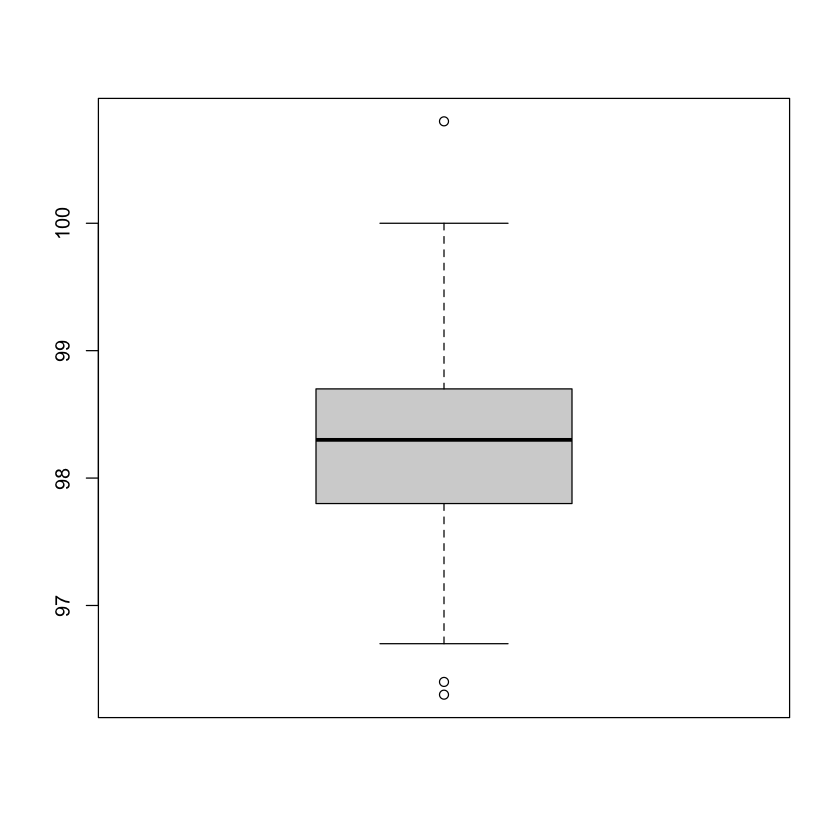

In [31]:
# Solution
boxplot(HumanTemp$Temp)

(c) Use your boxplot to estimate the median.

*Write your answer here. Double-click to edit.*

*Solution.* The median (thick black line in the boxplot) appears to be at about 98.3.

(d) Use R to calculate the exact median.

In [32]:
# Solution
median(HumanTemp$Temp)

[1] 98.3

(e) Use R to provide the five-number summary for the temperatures.

In [33]:
# Solution
summary(HumanTemp$Temp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  96.30   97.80   98.30   98.25   98.70  100.80 

(f) Make a histogram of the temperatures.

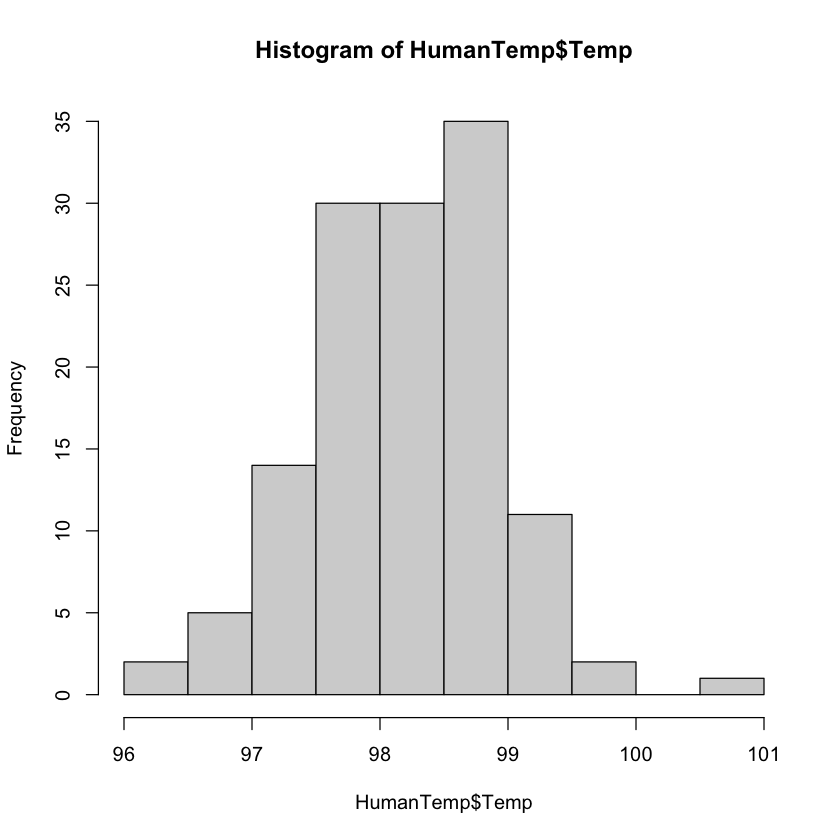

In [34]:
# Solution
hist(HumanTemp$Temp)

### Problem 6

(a) If we were to randomly sample 50 values from $N(0, 1)$ and create a Q-Q plot, what should we see (approximately) in the plot?

*Write your answer here. Double-click to edit.*

*Solution.* We should see an approximately straight line.

(b) The R code below generates 50 values from $N(0, 1)$ and makes the corresponding Q-Q plot. Run this code. 

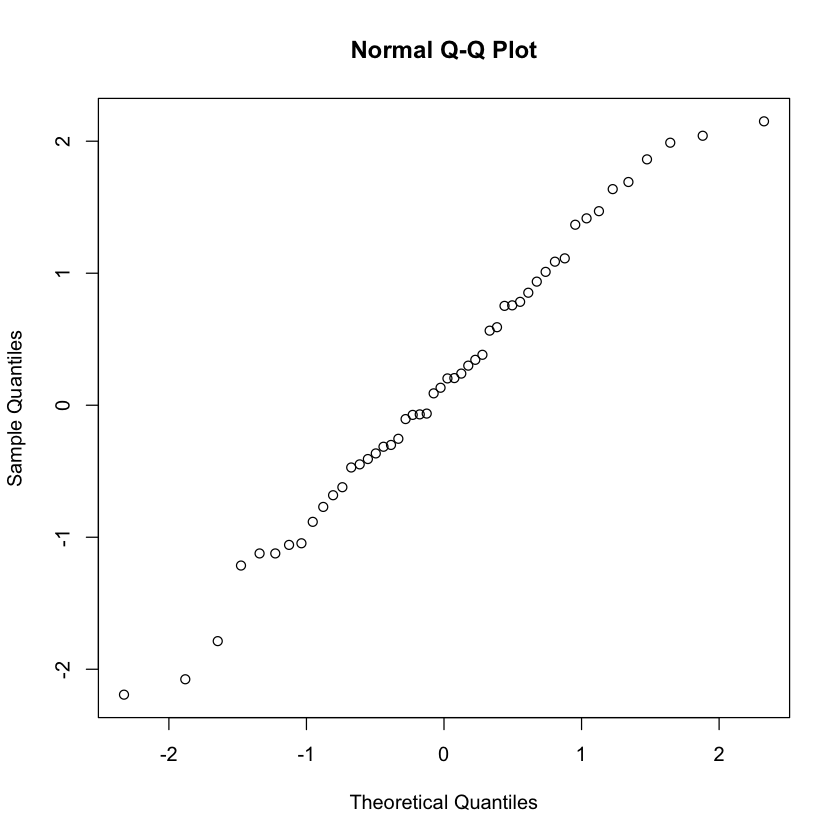

In [35]:
x <- rnorm(50, mean = 0, sd = 1)
qqnorm(x)

(c) Run the code in part (b) several times.
We know the data comes from $N(0, 1)$, so these are all examples of what a Q-Q plot may look like when the data truly comes from a Normal distribution.

(d) The R code below generates 50 values from an Exponential distribution with parameter $\lambda = 0.1$ and creates the corresponding Q-Q plot.
Run this code. What shape do you see in the Q-Q plot? This is an example of a Q-Q plot when the data truly does not come from a Normal distribution.

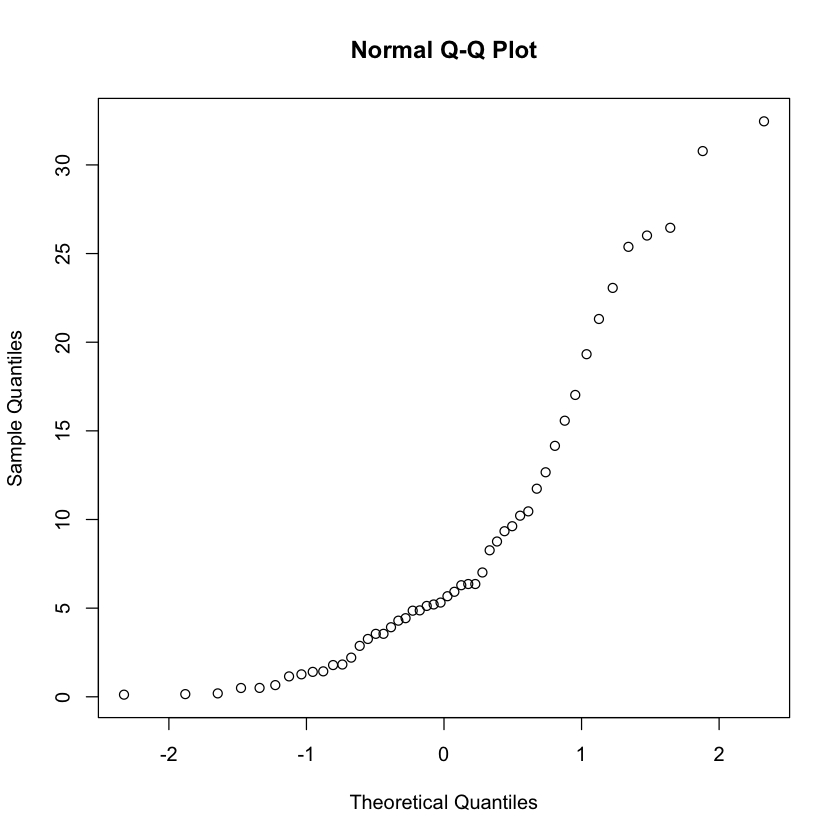

In [36]:
y <- rexp(50, 0.1)
qqnorm(y)

*Write your answer here. Double-click to edit.*

*Solution.* We see a curved shape, kind of like half a parabola.